# *Problem Statement*
-    Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [26]:
Crime=pd.read_csv(r"C:\Users\Rustham Sorab\Desktop\Data Science\7.Clustering\Raw Data\crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# *EDA*

In [27]:
df=Crime.rename({"Unnamed: 0":"State"},axis=1)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [29]:
df.shape

(50, 5)

In [30]:
df1=df.drop(["State"],axis=1)
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [31]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


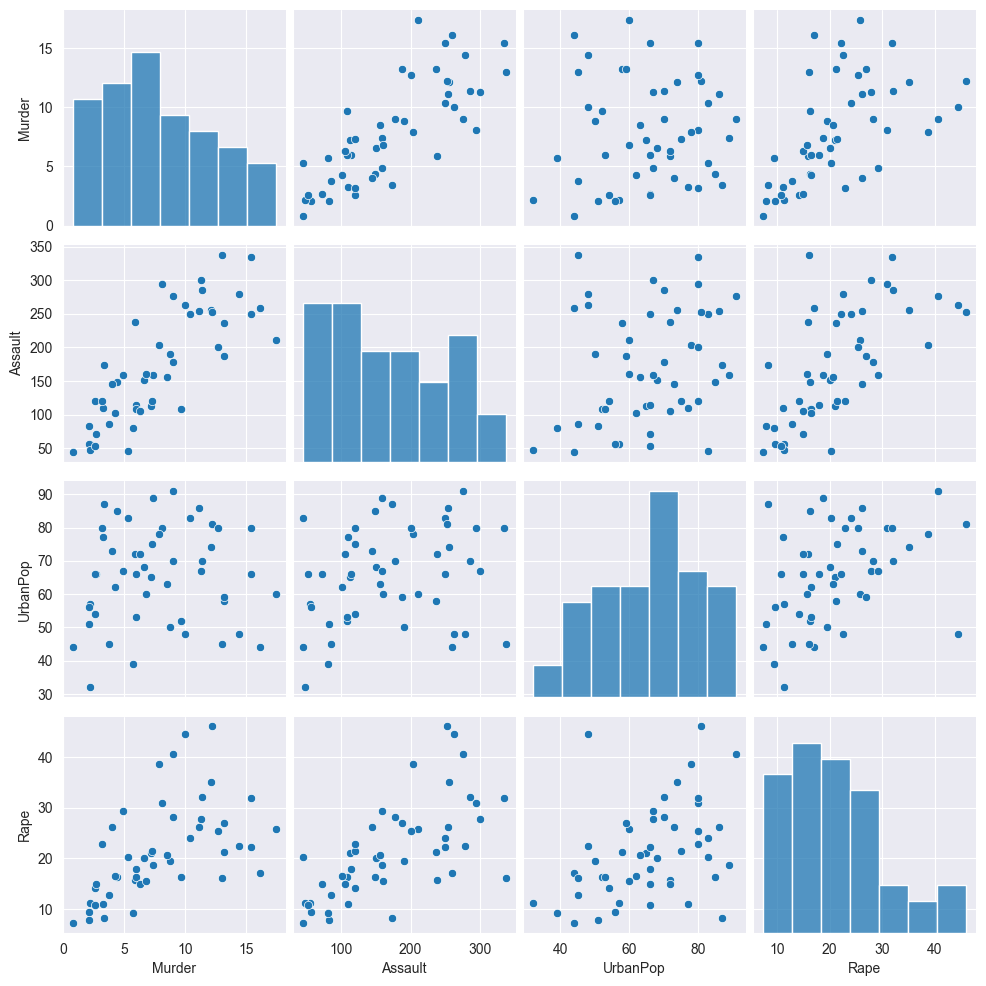

In [32]:
sns.pairplot(df)

<AxesSubplot:>

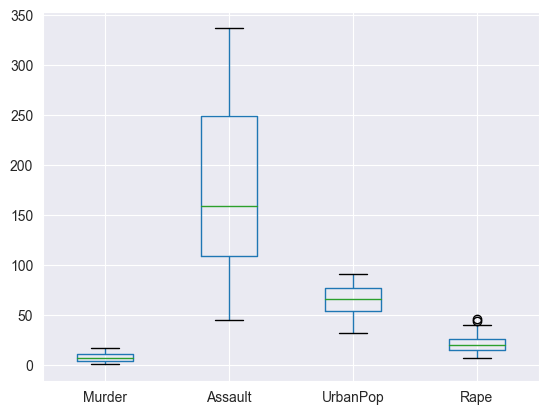

In [33]:
df.boxplot()

# *Feature Scaling*

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [35]:
df1=sc.fit_transform(df1)
df1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# *Hierarchical Clustering*

In [36]:
from scipy.cluster import hierarchy

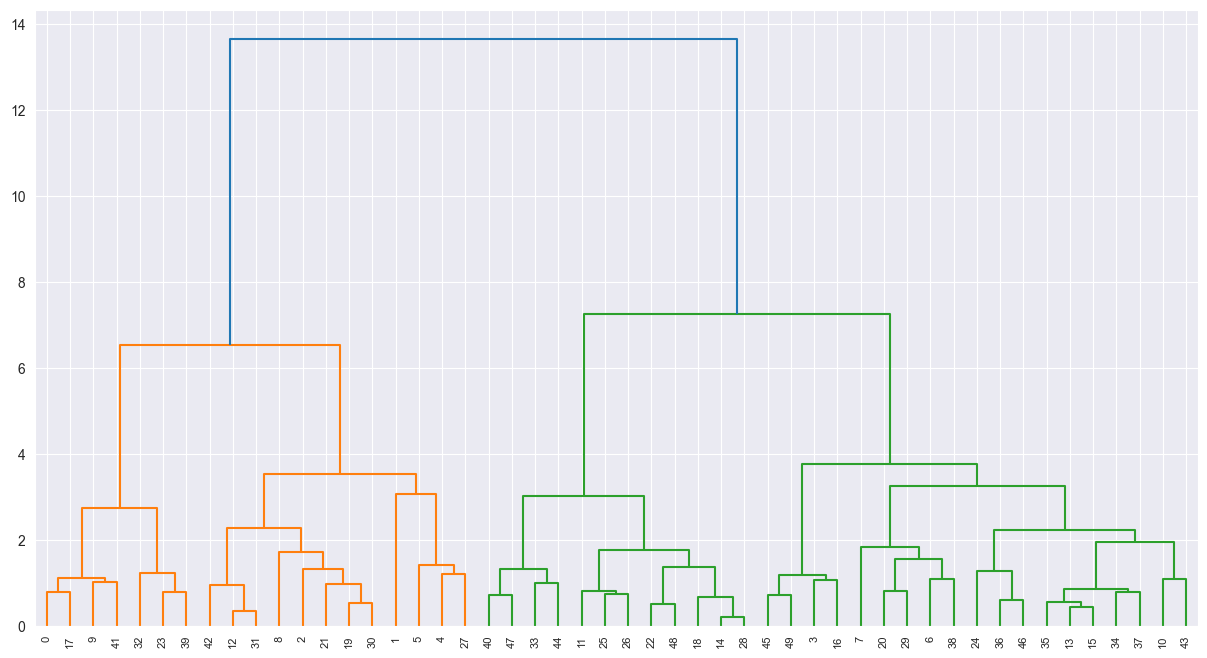

In [37]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df1, method="ward"))

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
hc = AgglomerativeClustering(n_clusters=4)
df2 = hc.fit_predict(df1)

In [40]:
df2

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [41]:
df['Cluster'] = df2

In [42]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [43]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [44]:
# City which have rate of Assault and rape is very high 
df[df['Cluster']==1]

,State,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [45]:
df.sort_values("Cluster").reset_index()

,index,State,Murder,Assault,UrbanPop,Rape,Cluster
0,24,Missouri,9.0,178,70,28.2,0
1,46,Washington,4.0,145,73,26.2,0
2,45,Virginia,8.5,156,63,20.7,0
3,43,Utah,3.2,120,80,22.9,0
4,38,Rhode Island,3.4,174,87,8.3,0
5,37,Pennsylvania,6.3,106,72,14.9,0
6,36,Oregon,4.9,159,67,29.3,0
7,35,Oklahoma,6.6,151,68,20.0,0
8,34,Ohio,7.3,120,75,21.4,0
9,29,New Jersey,7.4,159,89,18.8,0


In [46]:
df['Cluster'].value_counts()

0    19
1    12
2    12
3     7
Name: Cluster, dtype: int64

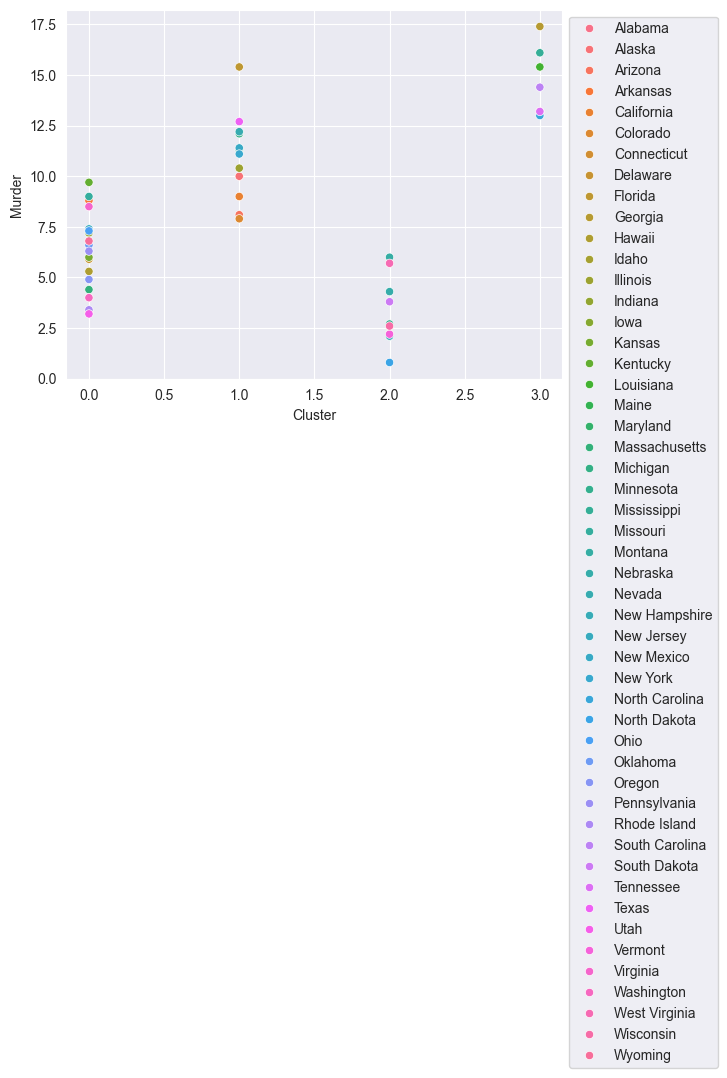

In [47]:
# plotting Cluster vs murder based on city
sns.scatterplot(x=df['Cluster'],y=df['Murder'],hue=df['State'])
plt.legend(bbox_to_anchor = (1,1))

# *KMeans*

In [48]:
from sklearn.cluster import KMeans

## Elbow Graph

In [49]:
wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [50]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 49.969202844527935,
 44.008573785634965,
 39.44879101757742,
 34.549419843859766,
 32.96196249428637,
 28.330285486113674,
 24.177977860439086,
 23.348400295734894,
 20.853607555635392,
 18.940558919848538]

Text(0, 0.5, 'WCSS')

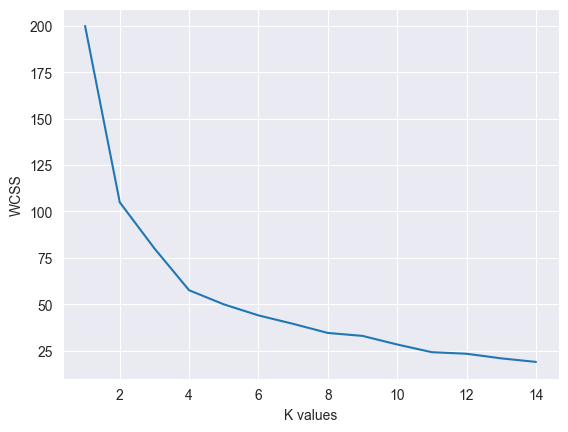

In [51]:
plt.plot(range(1,15), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [52]:
#k = 4
km=KMeans(n_clusters=4,random_state=0)
y1=km.fit_predict(df1)
y1

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [53]:
km.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [54]:
df['Cluster'] = y1

In [55]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [56]:
df['Cluster'].value_counts()

2    16
3    13
0    13
1     8
Name: Cluster, dtype: int64

In [57]:
df.groupby('Cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.656250,138.875000,73.875000,18.781250
3,10.815385,257.384615,76.000000,33.192308


# *DBSCAN*

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
dbscan = DBSCAN(eps=0.98, min_samples=3)
dbscan.fit(df1)

DBSCAN(eps=0.98, min_samples=3)

In [61]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [62]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusters
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,3,-1
3,Arkansas,8.8,190,50,19.5,1,-1
4,California,9.0,276,91,40.6,3,-1
5,Colorado,7.9,204,78,38.7,3,-1
6,Connecticut,3.3,110,77,11.1,2,1
7,Delaware,5.9,238,72,15.8,2,-1
8,Florida,15.4,335,80,31.9,3,-1
9,Georgia,17.4,211,60,25.8,1,0


In [63]:
c2 = pd.DataFrame(dbscan.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

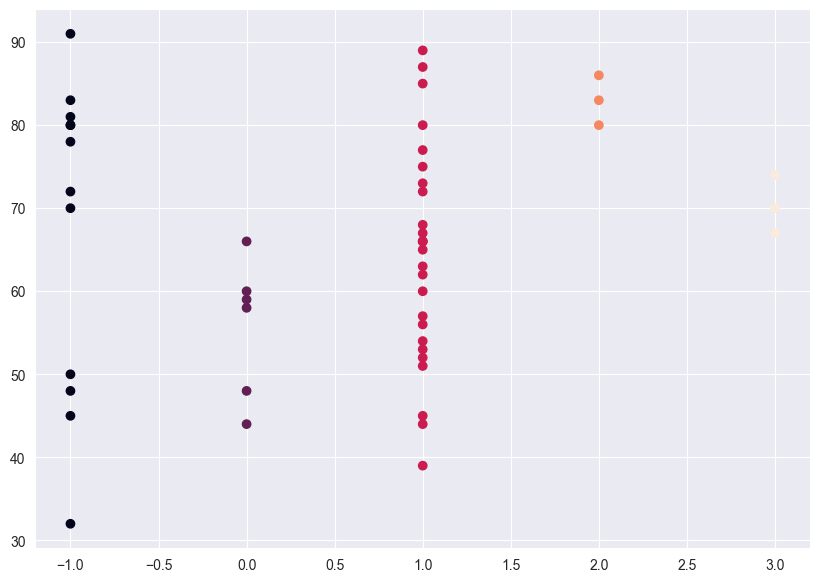

In [64]:
# Plot Clusters to dataset
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_) 